## GRIPOCTOBER2022
## Author: Krupa Jinsa Jigy
## Task-1: Prediction Using Supervised Machine Learning

## Introduction:
Supervised machine learning relies on labelled input and output training data. The labels are clearly stated. Supervised machine learning includes regression and classification. Simple linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line. Both the variables should be quantitative inorder to fit a linear regression model.

## Objective:
The objective of this analysis is to:

To predict the percentage recieved by a student basrd oon number of hours of study.
To calculate the score if the student studies for 9.25 hours each day.

## Data Description:
The data set contains two variables which are number of hours and score obtained by 25 students. Here the independent varaiable is number of hours and dependent variable is the score obtained.

## Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

## Importing the data

In [2]:
data=pd.read_excel(r'C:\Users\KRUPA JINSA JIGY\OneDrive\Desktop\Christ University\Sparks Intership\Sparks Task1 data.xlsx')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploratory Data Analysis

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Printing the details of the dataset
print("Details of the dataset: ")
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])
print(" ")
print("Datatype description (column wise): ")
data.info()

Details of the dataset: 
Number of rows:  25
Number of columns:  2
 
Datatype description (column wise): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
print("Column wise statistics: ")
data.describe()

Column wise statistics: 


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The data has 25 observations. There are 2 variables and both are continous variables. The mean value, minimum, maximum value and the quartile values are obtained using the describe function.

The maximum hours a student can study per day is 9.2 while the minimum is 1.1. The avareage number of hours students spent in studying is approximately 5 hours.
The maximum score obtained is 95% while the minimum score is 17%. The avareage score of the set of students is 51.48%.

In [6]:
## To check for number of unique vaules in each column
print("Number of unique values in each column: ")
data.nunique()

Number of unique values in each column: 


Hours     23
Scores    23
dtype: int64

In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

Data type conversion is not required as the varaiables are stored in correct data type.

In [8]:
## Missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values.

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


As the correlation between hours and scores is close to 1,there exist a strong positive correlation between the variables.

## Data Visualization

Text(0.5, 0, 'No. of hours studied')

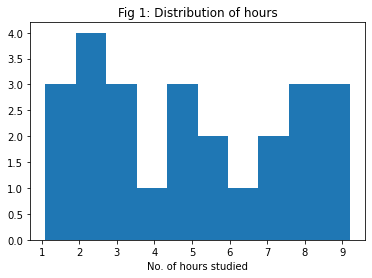

In [10]:
## Histogram
plt.hist(data["Hours"])
plt.title("Fig 1: Distribution of hours")
plt.xlabel("No. of hours studied")

Text(0.5, 0, 'Scores')

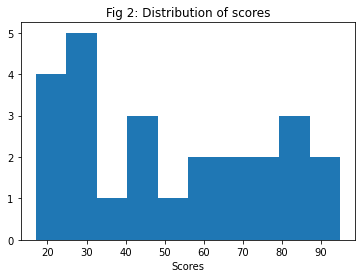

In [11]:
## Histogram
plt.hist(data["Scores"])
plt.title("Fig 2: Distribution of scores")
plt.xlabel("Scores")

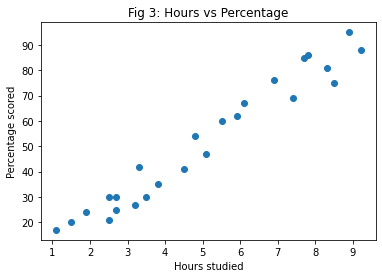

In [12]:
## Scatter plot
plt.scatter(data['Hours'],data['Scores'])
plt.ylabel('Percentage scored')
plt.xlabel('Hours studied')
plt.title('Fig 3: Hours vs Percentage')
plt.show()

#### Interpretation:
This shows that there is a positive relation between the hours studied by a student and the percentage that student scores.

Text(0.5, 1.0, 'Box plot for Hours')

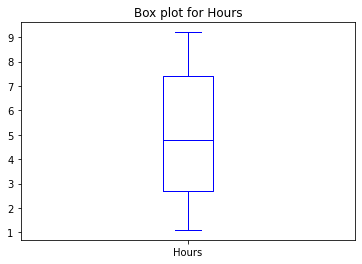

In [13]:
## Box plot
data.Hours.plot.box(color="blue")
plt.title("Box plot for Hours")

#### Interpretation:
This shows that the median hours of study per day by a student is almost 5 hours. It also shows that there is no presence of outliers and that it is not normally distributed since median is not equal to mean.

Text(0.5, 1.0, 'Box plot for Scores')

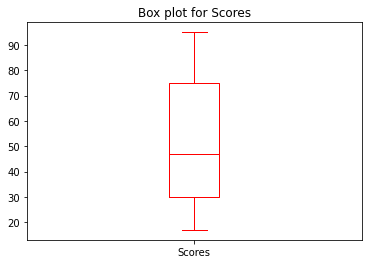

In [14]:
## Box plot
data.Scores.plot.box(color="red")
plt.title("Box plot for Scores")

####  Interpretation:
This shows that the percentage of scores by a student is around 48%. It also shows that there is no presence of outliers and that it is not normally distributed since median is not equal to mean.

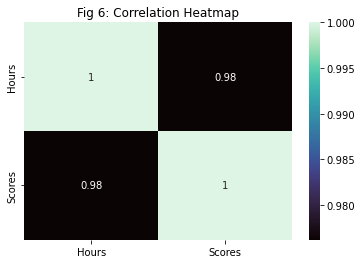

In [15]:
x = data.corr()

plt.figure(figsize = (6,4))
sns.heatmap(x, annot = True, cmap = "mako")
plt.title("Fig 6: Correlation Heatmap");

####  Interpretation:
The correlation coeffiecient is 0.98. This implies that the hours of tudy and the percentage scored by a student is highly positively correlated.

## Splitting the data

In [16]:
X= data.iloc[:, :-1].values 
y = data.iloc[:, 1].values 

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=123)

In [18]:
X_train.shape

(20, 1)

In [19]:
X_test.shape

(5, 1)

Te data set is split into training data and testing data. 80% of the data is used to train the model and the remaining 20% of the data is used for testing the model.

## Fitting the model

In [20]:
from sklearn.linear_model import LinearRegression 

clf=LinearRegression()
model=clf.fit(X_train,y_train) 
print("Training complete.\n")
print("The estimates of the parameters are:")
      
print("The regression coefficient of the model is",clf.coef_)
print("The constant value of the model is",clf.intercept_)

Training complete.

The estimates of the parameters are:
The regression coefficient of the model is [9.60171878]
The constant value of the model is 2.695388922345721


The fitted regression model is

Score= 1.98+ 9.83* Hours

The sign of the regression coefficient of Hours is positive which implies that as the number of study hours increases the score will also increase. That is when the independent variable increases the mean of the dependent variable also increases.

The intercept term is equal to 1.98 which is the average score when the regressor is considered to be zero( 0 hour).

The coefficient for Hour is equal to 9.83 which implies that when the students increases their studying hours by one, the Score will increase by 9.83%

## Visualising the fitted line on the Data Set

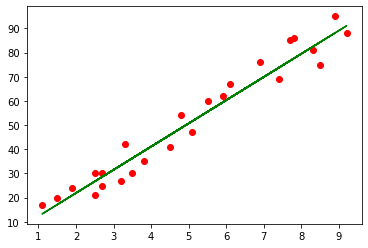

In [21]:
# Plotting the regression line
line = clf.coef_*X+clf.intercept_
# Plotting for the test data
plt.scatter(X, y,color="red")
plt.plot(X, line,color="green")
plt.show()

#### Interpretation:
From the above plot, it can be observed that all the points lies around the regression line which implies that the model is a good fit.

## Predicting the Scores

In [22]:
y_pred = clf.predict(X_test) 
y_pred

array([17.09796709, 48.78363906, 39.18192028, 61.26587347, 88.15068605])

The predicited scores are obtained for the tested data.

## Comparison of Actual Values vs Predicted Values

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,17.097967
1,54,48.783639
2,35,39.181920
3,67,61.265873
4,95,88.150686


#### Interpretation:
We compare the predicted score with the actual score of the students and it can be observed that the predicted scores are closer to the actual scores. Thus the prediction is almost accurate.

## Predicting Score if student Studies 9.5 hours a day

In [24]:
hours = 9.25
pred = clf.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 91.51128761861358


#### Interpretation:
The score if the student studies for 9.25 hours each day is predicted to be 92.67%.

## Accuracy Measures

### 1) R-squared value

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9605221627526418

The R square value is 0.9 which implies that 90% of the total variation in the scores is explained by the number of hours the students study. The r square value is closer to one thus the model is a good fit.

### 2) Mean Square Error

In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error is:",mse)

Mean squared error is: 26.582796488881094


### 3) Mean Absolute Error

In [27]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error is:",mae)

Mean absolute error is: 4.976750923680403


## Conclusion:
For the given dataset explorative data analysis is carried out and the necessary data transformations are done. The transformed data is splitted to train and test data sets. For the train data set linear regression algorithm is implemented. Since the data set has continous variables we use linear regression to fit the model. We obtain the accuracy measure and though the r squared value we can observe that the model is a good fit.